In [2]:
!nvidia-smi

Sat Feb 22 16:15:17 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.256.02   Driver Version: 470.256.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 N/A |                  N/A |
| 30%   33C    P8    N/A /  N/A |    222MiB /  2001MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install simpletransformers
!pip install tensorboardx

In [5]:
from urllib import request
import pandas as pd
import logging
import torch
import matplotlib.pyplot as plt

In [6]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [7]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [8]:
from dont_patronize_me import DontPatronizeMe

In [9]:
dpm = DontPatronizeMe('./Dont_Patronize_Me_Trainingset', '.')

In [10]:
dpm.load_task1()
dpm.load_task2(return_one_hot=True)

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


In [11]:
trids = pd.read_csv('./Train_Dev_Split/train_semeval_parids-labels.csv')
teids = pd.read_csv('./Train_Dev_Split/dev_semeval_parids-labels.csv')

In [12]:
trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

In [13]:
data=dpm.train_task1_df

In [14]:
data

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


# Quantitative Data Analysis

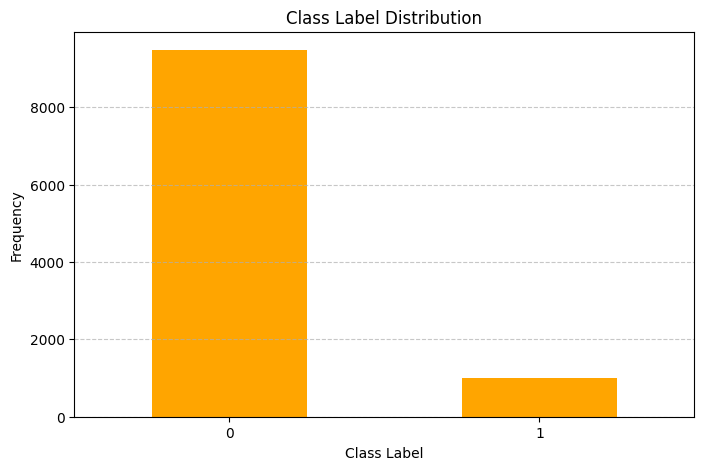

In [15]:
# Plot 1: Class Frequency Distribution
plt.figure(figsize=(8, 5))
data["label"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Label Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

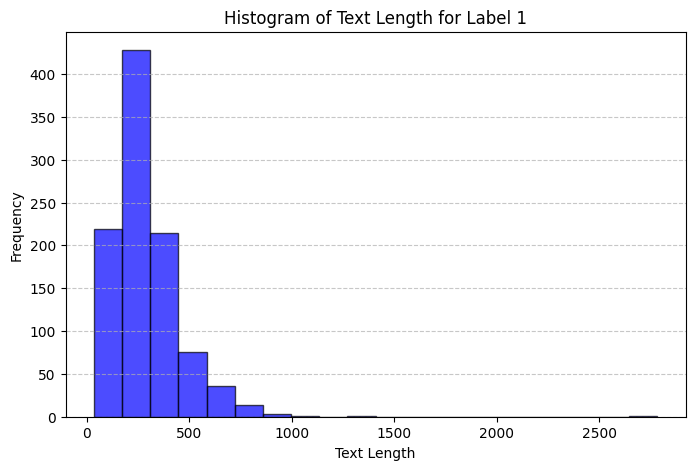

In [16]:
# Plot 2: Box Plot of Text Length by Label
data["text_length"] = data["text"].apply(len)

# Filter dataset for label = 1
df_label_1 = data[data["label"] == 1]

# Plot Histogram for Text Length (Label 1)
plt.figure(figsize=(8, 5))
plt.hist(df_label_1["text_length"], bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Histogram of Text Length for Label 1")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

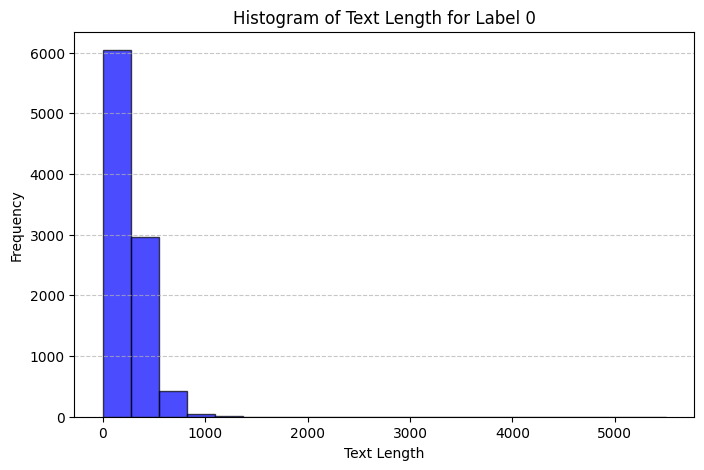

In [17]:
# Plot 2: Box Plot of Text Length by Label
data["text_length"] = data["text"].apply(len)

# Filter dataset for label = 0
df_label_1 = data[data["label"] == 0]

# Plot Histogram for Text Length (Label 1)
plt.figure(figsize=(8, 5))
plt.hist(df_label_1["text_length"], bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Histogram of Text Length for Label 0")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

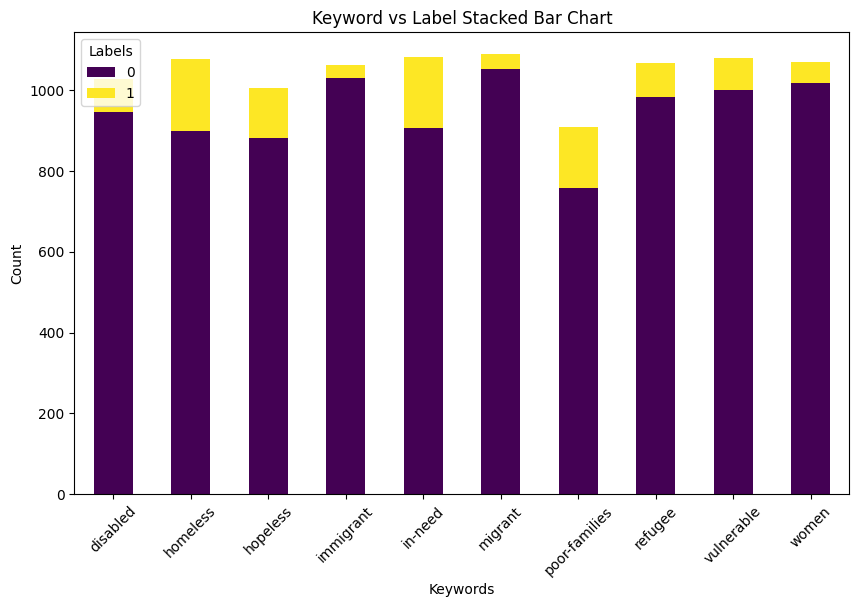

In [18]:
# Create frequency table
keyword_label_counts = data.groupby(["keyword", "label"]).size().unstack()

# Plot stacked bar chart
keyword_label_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.title("Keyword vs Label Stacked Bar Chart")
plt.legend(title="Labels")
plt.xticks(rotation=45)
plt.show()

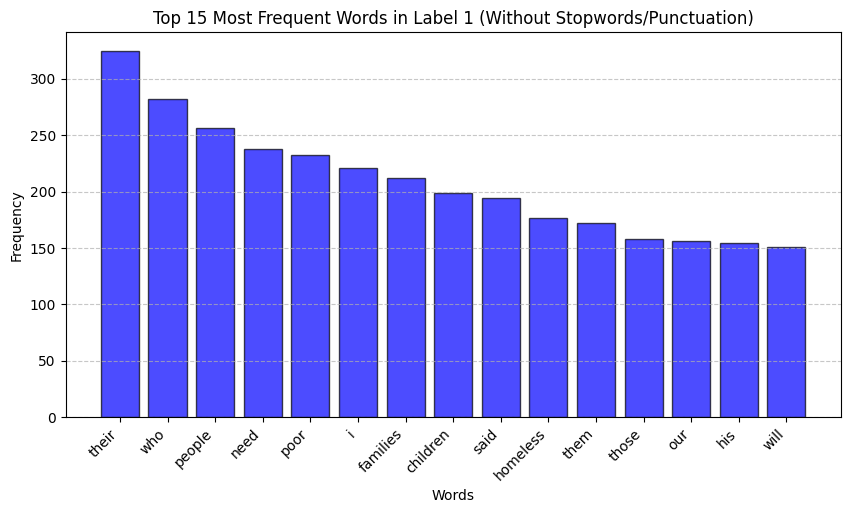

In [19]:
import string
import matplotlib.pyplot as plt
from collections import Counter

# Define stopwords (common articles, prepositions, pronouns)
stop_words = set([
    "a", "an", "the", "and", "or", "but", "if", "then", "with", "of", "at", "in", "on",
    "to", "for", "by", "from", "about", "as", "is", "it", "this", "that", "which", "was",
    "were", "be", "been", "has", "had", "have", "not", "are", "we", "you", "he", "she", "they", "s"
])

# Remove punctuation function
punctuation_table = str.maketrans("", "", string.punctuation)

# Filter dataset for label = 1
df_label_1 = data[data["label"] == 1]

# Create word frequency dictionary (Corrected)
word_counts = Counter()
for text in df_label_1["text"]:
    text = text.lower().translate(punctuation_table)  # Remove punctuation and lowercase
    words = text.split()  # Tokenize words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    word_counts.update(filtered_words)  # Update word frequency

# Get top k words
k = 15
top_words = word_counts.most_common(k)

# Extract words and frequencies
words, frequencies = zip(*top_words)

# Plot histogram using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {k} Most Frequent Words in Label 1 (Without Stopwords/Punctuation)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


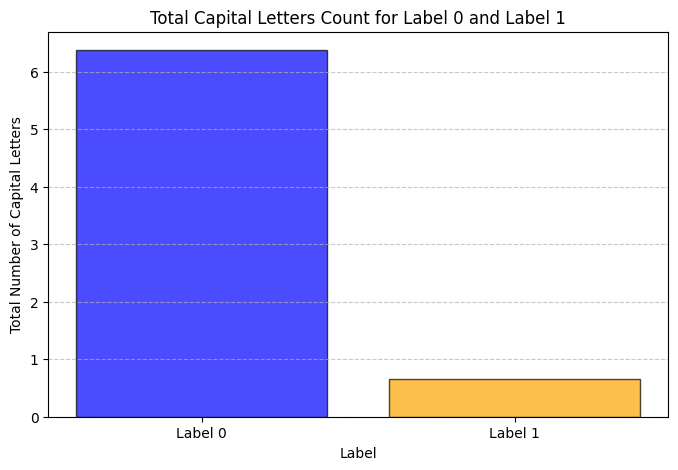

In [20]:
# Compute the number of capital letters in each text sample
data["capital_letters"] = data["text"].apply(lambda x: sum(1 for char in x if char.isupper()))

# Count the total number of capital letters in texts with label 0
capital_letters_label_0 = data[data["label"] == 0]["capital_letters"].sum() / len(data)

# Count the total number of capital letters in texts with label 1
capital_letters_label_1 = data[data["label"] == 1]["capital_letters"].sum() / len(data)

plt.figure(figsize=(8, 5))
plt.bar(["Label 0", "Label 1"], [capital_letters_label_0, capital_letters_label_1], 
        color=["blue", "orange"], edgecolor="black", alpha=0.7)
plt.xlabel("Label")
plt.ylabel("Total Number of Capital Letters")
plt.title("Total Capital Letters Count for Label 0 and Label 1")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
